In [43]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [44]:
concrete_df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/concrete.csv") 

In [45]:
concrete_df.shape

(1030, 9)

In [74]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [73]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [75]:
concrete_df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
860,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
383,366.0,187.0,0.0,191.0,7.0,824.0,757.0,28,65.91
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28,40.87
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.40
41,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,56,60.32
935,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,28,67.31
897,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3,24.40
769,374.0,0.0,0.0,190.0,7.0,1013.0,730.0,28,39.05
760,277.1,0.0,97.4,160.6,11.8,973.9,875.6,28,48.28
40,194.7,0.0,100.5,170.2,7.5,998.0,901.8,14,24.28


In [48]:
X = concrete_df.drop(['strength'], axis=1)
y = concrete_df[['strength']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [50]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [51]:
reg_model.score(X_train, y_train)


0.6031487540630229

In [52]:
reg_model.score(X_test, y_test)

0.6339136715208276

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

#y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.7549578268848264


In [54]:
print(poly_clf.score(X_test2, y_test))

0.7444710081435623


In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
model=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3)

In [57]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [58]:
model.score(X_train,y_train)

0.6358072763408258

In [59]:
model.score(X_test,y_test)

0.583104124329016

In [60]:
from sklearn.ensemble import BaggingRegressor

In [65]:
model1=BaggingRegressor(n_estimators=14,base_estimator=model)
model1.fit(X_train,y_train)

C:\Users\munmu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                      max_depth=3),
                 n_estimators=14)

In [66]:
model1.score(X_train,y_train)


0.7189457128904284

In [67]:
model1.score(X_train,y_train)


0.7189457128904284

In [68]:
model1.score(X_test,y_test)

0.6484877065985803

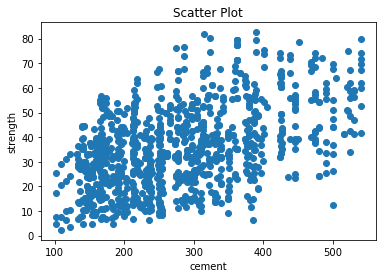

In [77]:
plt.scatter(concrete_df['cement'], concrete_df['strength'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('cement')
plt.ylabel('strength')
 
plt.show()

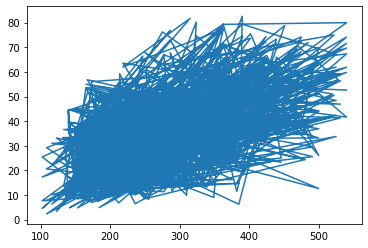

In [78]:
xpoints = concrete_df['cement']
ypoints = concrete_df['strength']
plt.plot(xpoints, ypoints)
plt.show()